# met data

In [1]:
%load_ext wurlitzer

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageStat
import math
from umap import UMAP
from MulticoreTSNE import MulticoreTSNE

plt.style.use('seaborn')

In [44]:
test = pd.read_csv('../data/met.csv')
test.shape

(1517, 43)

In [3]:
artworks = pd.read_csv('../data/met.csv')

In [41]:
artworks.shape

(1517, 54)

In [5]:
# inspect one data point
artworks.loc[0]

Object Number                                                        51.12.2
Is Highlight                                                            True
Is Public Domain                                                        True
Object ID                                                                200
Department                                          American Decorative Arts
Object Name                                                         Armchair
Title                                                  Spindle-back armchair
Culture                                                             American
Period                                                                   NaN
Dynasty                                                                  NaN
Reign                                                                    NaN
Portfolio                                                                NaN
Artist Role                                                              NaN

In [37]:
artworks['River'].unique()

array([nan, 'Inland Niger Delta region'], dtype=object)

In [6]:
X = []
w = []
h = []
for index, artwork in artworks.iterrows():
#     print(artwork['Object ID'])
    im = Image.open('../static/images/met/' + str(artwork['Object ID']) + '.jpg')
    w.append(im.size[0])
    h.append(im.size[1])
    im = im.resize((250, 250), Image.ANTIALIAS)
    X.append(np.array(im).flatten())

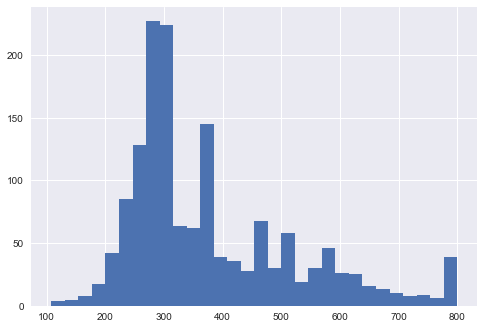

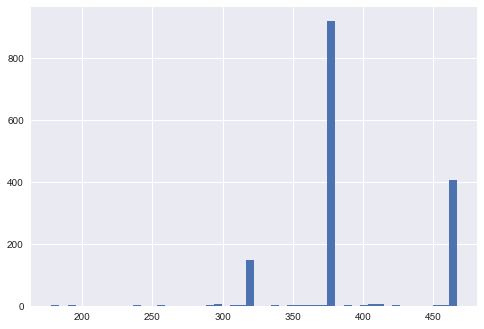

In [7]:
plt.hist(w, bins=30)
plt.show()

plt.hist(h, bins=50)
plt.show()

In [8]:
X = np.array(X)
np.array(X).shape

(1517, 187500)

In [9]:
# brightness measures
# https://stackoverflow.com/questions/3490727/what-are-some-methods-to-analyze-image-brightness-using-python
def brightness_avg( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0]

def brightness_rms( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.rms[0]

def brightness_avg_perceived( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    r,g,b = stat.mean
    return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

def brightness_rms_perceived( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    r,g,b = stat.rms
    return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

def brightness_perceived_avg( im_file ):
    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    gs = (math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2)) 
        for r,g,b in im.getdata())
    return sum(gs)/stat.count[0]

In [27]:
# load downloaded images and compute their brightness measures

brightness_avg_list = []
brightness_rms_list = []
brightness_avg_perceived_list = []
brightness_rms_perceived_list = []
brightness_perceived_avg_list = []

for index, artwork in artworks.iterrows():
#     print(artwork['Object ID'])
    im_path = '../static/images/met/' + str(artwork['Object ID']) + '.jpg'
    brightness_avg_list.append(brightness_avg(im_path))
    brightness_rms_list.append(brightness_rms(im_path))
    brightness_avg_perceived_list.append(brightness_avg_perceived(im_path))
    brightness_rms_perceived_list.append(brightness_rms_perceived(im_path))
    brightness_perceived_avg_list.append(brightness_perceived_avg(im_path))

artworks['brightness_avg'] = brightness_avg_list
artworks['brightness_rms'] = brightness_rms_list
artworks['brightness_avg_perceived'] = brightness_avg_perceived_list
artworks['brightness_rms_perceived'] = brightness_rms_perceived_list
artworks['brightness_perceived_avg'] = brightness_perceived_avg_list

In [28]:
# save new data with brightness columns
artworks.to_csv('../data/met-with-brightness.csv')

In [12]:
# np.savetxt('X.csv', X)

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(np.sum(pca.explained_variance_ratio_), '% variance captured')
print(X_pca.shape)

0.566222593642 % variance captured
(1517, 2)


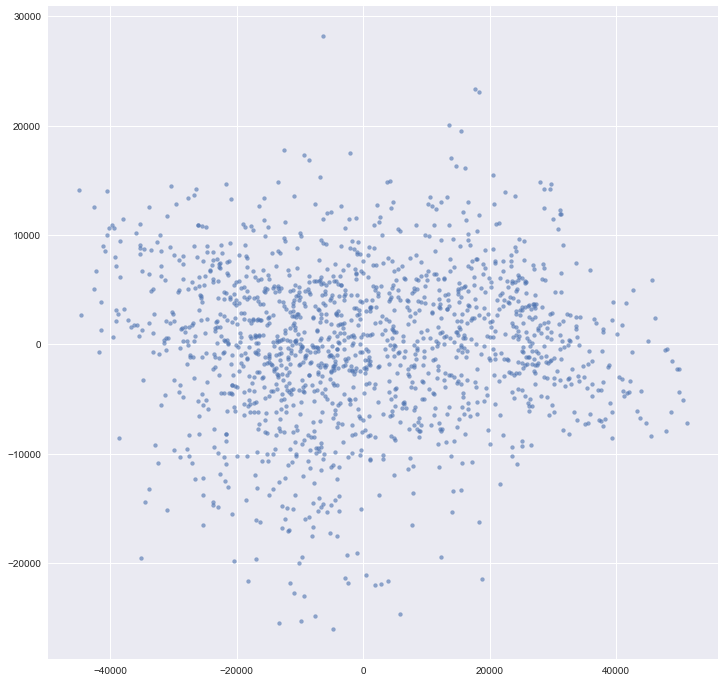

In [14]:
plt.figure(figsize=((12,12)))
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], alpha=0.6, s=15)
plt.show()

In [20]:
mctsne = MulticoreTSNE(n_jobs=4, verbose=True)
X_mctsne = mctsne.fit_transform(X.astype(np.float64))
print(X_mctsne.shape)

Performing t-SNE using 4 cores.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 264.00 seconds (sparsity = 0.094233)!
Learning embedding...
Iteration 50: error is 68.685168 (50 iterations in 0.00 seconds)
Iteration 100: error is 66.569095 (50 iterations in 0.00 seconds)
Iteration 150: error is 66.587270 (50 iterations in 0.00 seconds)
Iteration 200: error is 66.555946 (50 iterations in 0.00 seconds)
Iteration 250: error is 3.060813 (50 iterations in 1.00 seconds)
Iteration 300: error is 1.728371 (50 iterations in 0.00 seconds)
Iteration 350: error is 1.565987 (50 iterations in 0.00 seconds)
Iteration 400: error is 1.517998 (50 iterations in 0.00 seconds)
Iteration 450: error is 1.497386 (50 iterations in 0.00 seconds)
Iteration 500: error is 1.487497 (50 iterations in 0.00 seconds)
Iteration 550: error is 1.480666 (50 iterations in 0.00 seconds)
Iteration 600: error is 1.476554 (50 iterations in 1.00 seconds)
Iter

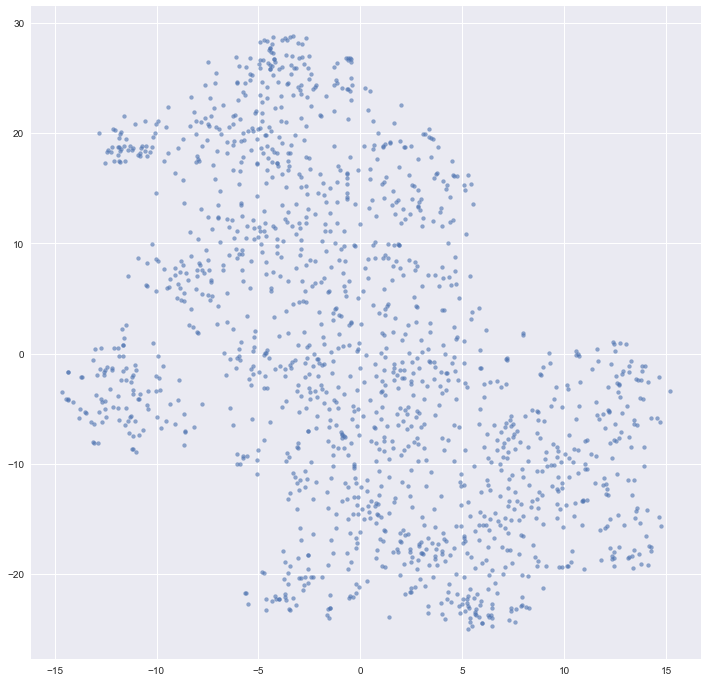

In [22]:
plt.figure(figsize=((12,12)))
plt.scatter(x=X_mctsne[:,0], y=X_mctsne[:,1], alpha=0.6, s=15)
plt.show()

In [17]:
umap = UMAP()
X_umap = umap.fit_transform(X)
print(X_umap.shape)

(1517, 2)


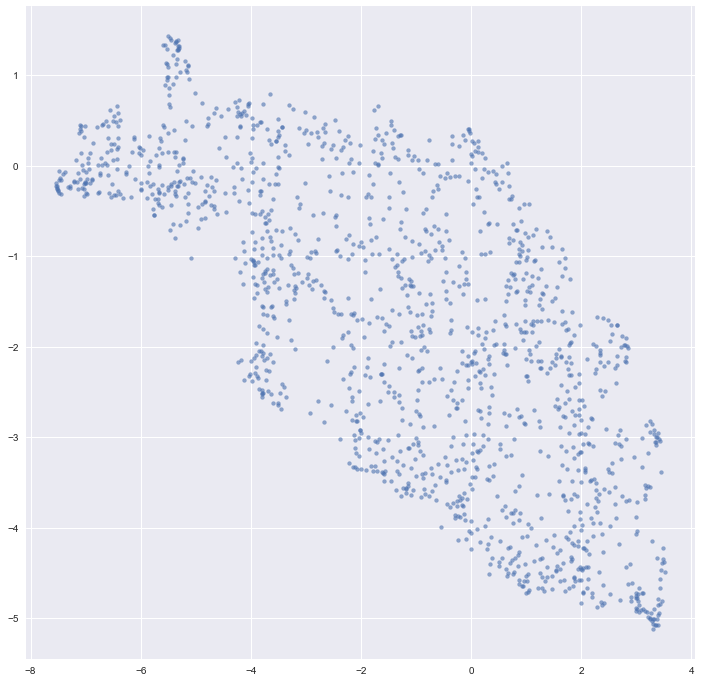

In [18]:
plt.figure(figsize=((12,12)))
plt.scatter(x=X_umap[:,0], y=X_umap[:,1], alpha=0.6, s=15)
plt.show()

In [23]:
artworks['X_pca_x'] = X_pca[:,0]
artworks['X_pca_y'] = X_pca[:,1]
artworks['X_mctsne_x'] = X_mctsne[:,0]
artworks['X_mctsne_y'] = X_mctsne[:,1]
artworks['X_umap_x'] = X_umap[:,0]
artworks['X_umap_y'] = X_umap[:,1]

In [30]:
artworks.to_csv('../data/met-with-coordinates.csv')

In [29]:
artworks.keys()

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID',
       'Department', 'Object Name', 'Title', 'Culture', 'Period', 'Dynasty',
       'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Metadata Date',
       'Repository', 'X_pca_x', 'X_pca_y', 'X_mctsne_x', 'X_mctsne_y',
       'X_umap_x', 'X_umap_y', 'brightness_avg', 'brightness_rms',
       'brightness_avg_perceived', 'brightness_rms_perceived',
       'brightness_perceived_avg'],
      dtype='object')

In [40]:
print( np.min(X_pca[:,0]) )
print( np.max(X_pca[:,0]) )
print( np.min(X_pca[:,1]) )
print( np.max(X_pca[:,1]) )
print('\n')
print( np.min(X_mctsne[:,0]) )
print( np.max(X_mctsne[:,0]) )
print( np.min(X_mctsne[:,1]) )
print( np.max(X_mctsne[:,1]) )
print('\n')
print( np.min(X_umap[:,0]) )
print( np.max(X_umap[:,0]) )
print( np.min(X_umap[:,1]) )
print( np.max(X_umap[:,1]) )

-44982.3291712
51220.5979909
-26048.7008932
28175.0479947


-14.643659372
15.2027377409
-25.0181574763
28.8152981955


-7.5336359646
3.51556272925
-5.11965178363
1.42735338119


In [57]:
columns_to_keep = set(['Object Number', 'Object Name', 'Title', 'Artist Display Name', 'Object Date', 'Object Begin Date', 'Object End Date',
                   'X_pca_x', 'X_pca_y', 'X_mctsne_x', 'X_mctsne_y','X_umap_x', 'X_umap_y',
                   'brightness_avg', 'brightness_rms','brightness_avg_perceived',
                   'brightness_rms_perceived','brightness_perceived_avg'])

all_columns = set(artworks.keys())

columns_to_drop = list(all_columns-columns_to_keep)
pruned_artworks = artworks.drop(columns_to_drop, 1)

In [58]:
pruned_artworks

,Object Number,Object Name,Title,Artist Display Name,Object Date,Object Begin Date,Object End Date,X_pca_x,X_pca_y,X_mctsne_x,X_mctsne_y,X_umap_x,X_umap_y,brightness_avg,brightness_rms,brightness_avg_perceived,brightness_rms_perceived,brightness_perceived_avg
0,51.12.2,Armchair,Spindle-back armchair,NaN,1640–80,1640,1680,-16431.241270,-7301.947614,1.983447,-9.244183,0.329843,-3.319300,159.147486,168.512535,159.045875,168.924845,159.868099
1,1970.35.1,Armchair,Armchair,Pottier and Stymus Manufacturing Company,ca. 1870–75,1867,1875,-12828.468695,-2731.663709,0.928294,-10.632472,0.315034,-3.902879,156.508161,165.684629,157.000236,166.482834,157.671959
2,54.167,Basket,Basket,Myer Myers,1770–76,1770,1776,-23748.682270,5976.715853,6.323534,-15.996272,2.073283,-3.368428,181.040065,182.849682,181.659343,183.468513,181.665264
3,12.3.1,Basin,Basin,Master Potter A,ca. 1650,1647,1650,14771.325817,2167.200424,-1.488865,12.801003,-3.682093,-0.539832,93.437180,101.035242,94.173648,102.081193,94.476578
4,38.63,Bowl,Two-handled Bowl,Cornelius Kierstede,1700–1710,1700,1710,-18376.982774,7103.721679,6.363242,-14.994393,1.932354,-3.181917,169.054856,171.476677,169.294475,171.743859,169.295663
5,"77.9a, b",Vase,The Bryant Vase,James Horton Whitehouse|Tiffany & Co.|Eugene J...,1875–76,1875,1876,-15634.785115,4872.456587,7.299696,-13.422324,1.563552,-2.581859,161.121375,164.160863,161.264765,164.284689,161.271553
6,10.125.83,Bureau table,Bureau table,John Townsend,ca. 1765,1762,1765,-4088.085685,-17560.866360,12.894558,-1.588811,0.067349,-2.045003,125.289410,138.235477,124.987966,138.641846,125.950977
7,1985.116,Cabinet,Cabinet,Daniel Pabst,ca. 1877–80,1874,1880,-7211.035757,-15249.184304,12.726618,-3.987011,0.322185,-2.109723,138.395745,151.522995,138.990132,153.317136,141.156593
8,68.100.1,Cabinet,Cabinet,Alexander Roux,ca. 1866,1863,1866,1908.511390,-22013.926222,-8.384428,2.577449,-0.920740,-2.768380,112.814071,138.806381,113.322929,139.500822,113.856271
9,1986.237,Celery vase,Celery vase,Boston & Sandwich Glass Company,1827–35,1827,1835,-28546.131873,7357.116502,6.533338,-16.789663,2.277694,-3.832371,191.284545,195.195073,191.302909,195.222360,191.320625


In [59]:
pruned_artworks.to_csv('../data/met-with-coordinates.csv')